## Yelp Project

### Import Dependencies

In [2]:
import requests
from API_key import api_key #separate .py script containing function which returns my API key
import geopy
import folium

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import time

### Gather data using API

In [2]:
API_key = api_key() #returns our API key

def gather_data(API_key):
    '''Function that calls from the API using the given API key to gather data from yelp reviews of restaurants from London.
    INPUT
    -----
    API_key: str
        API key string used to send requests for our data

    RETURN
    ------
    all_restaurants: list
        list of dictionaries of the infomation for each location
    '''
    endpoint = "https://api.yelp.com/v3/businesses/search" #endpoint for data gathering
    headers = {
        'Authorization': f'bearer {API_key}' #header for authentication
    }
    num_requests = 0 #initial number of request loops
    all_restaurants = [] #initial list of collected dictionaries
    while True:
        parameters = {
            'location': 'London', #we want to find restaurants in London
            'limit': 50, #default limit is 50
            'offset': 1 + 50*num_requests #sets starting point for collection
        }
        if parameters['limit'] + parameters['offset'] > 1000: #error produced from responce variable if this criteria is broken
            break #break while loop
        response = requests.get(url = endpoint, params = parameters, headers = headers) #gather desired data in form of JSON file
        restaurants = response.json() #convert JSON to list of dictionary
        all_restaurants += restaurants['businesses'] #add dictionaries to list of total data
        num_requests += 1 #add one to value of variable
    return all_restaurants

all_restaurants = gather_data(API_key)
print(f'Collected {len(all_restaurants)} restaurant\'s data.')

Collected 950 restaurant's data.


API request from Yelp does not allow for the gathering of 1000 or more data points. Thus, we are forced to set the number of data points used for this project to 950. This isn't too bad of a compromise but concerns may may start if we are forced to delete too many rows during Data Cleaning. 

### Convert data into Pandas Dataframe

In [3]:
df = pd.DataFrame(all_restaurants) #convert our list of dictionaries into a pandas dataframe
display(df.head()) #print top 5 entries to check convertion held

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,YRA2VnhFLChIh1ZD31cXjg,the-british-museum-london,The British Museum,https://s3-media3.fl.yelpcdn.com/bphoto/7miqMp...,False,https://www.yelp.com/biz/the-british-museum-lo...,1086,"[{'alias': 'museums', 'title': 'Museums'}]",4.5,"{'latitude': 51.518298, 'longitude': -0.126026}",[],"{'address1': 'Great Russell Street', 'address2...",+442073238299,+44 20 7323 8299,917.090407,NaN
1,mc1KLbA1Sy4kUTKo0ZEeRQ,dishoom-london-7,Dishoom,https://s3-media2.fl.yelpcdn.com/bphoto/bnu8b8...,False,https://www.yelp.com/biz/dishoom-london-7?adju...,630,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 51.513087, 'longitude': -0.139767}",[],"{'address1': '22 Kingly Street', 'address2': N...",+442074209322,+44 20 7420 9322,265.215272,££
2,ElxBJGffVB-jV1kMCG9PbQ,the-national-gallery-london-2,The National Gallery,https://s3-media3.fl.yelpcdn.com/bphoto/4BJTgx...,False,https://www.yelp.com/biz/the-national-gallery-...,491,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 51.508929, 'longitude': -0.128302}",[],"{'address1': 'Trafalgar Square', 'address2': '...",+4420077472885,+44 20077472885,685.013840,NaN
3,v1Lpwqs75mmQ0ugugoqTvA,tower-of-london-london-2,Tower of London,https://s3-media1.fl.yelpcdn.com/bphoto/GCoS_4...,False,https://www.yelp.com/biz/tower-of-london-londo...,712,"[{'alias': 'landmarks', 'title': 'Landmarks & ...",4.5,"{'latitude': 51.5083008269638, 'longitude': -0...",[],"{'address1': 'Tower Hill', 'address2': '', 'ad...",+442031666000,+44 20 3166 6000,4174.992613,NaN
4,NPAkaFjtmDC8IKC60u5PAw,coca-cola-london-eye-london,Coca Cola London Eye,https://s3-media1.fl.yelpcdn.com/bphoto/FZJ4ky...,False,https://www.yelp.com/biz/coca-cola-london-eye-...,1065,"[{'alias': 'landmarks', 'title': 'Landmarks & ...",4.0,"{'latitude': 51.503364, 'longitude': -0.11957}",[],"{'address1': 'Riverside Building', 'address2':...",,,1547.650442,NaN


### Save and Load Pandas Dataframe into local .csv file

In [4]:
df.to_csv('raw_data.csv',index=False) #save dataframe into .csv file

In [27]:
df = pd.read_csv('raw_data.csv',index_col=False) #load our raw_data dataframe

### Data Cleaning

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             950 non-null    object 
 1   alias          950 non-null    object 
 2   name           950 non-null    object 
 3   image_url      950 non-null    object 
 4   is_closed      950 non-null    bool   
 5   url            950 non-null    object 
 6   review_count   950 non-null    int64  
 7   categories     950 non-null    object 
 8   rating         950 non-null    float64
 9   coordinates    950 non-null    object 
 10  transactions   950 non-null    object 
 11  location       950 non-null    object 
 12  phone          900 non-null    float64
 13  display_phone  900 non-null    object 
 14  distance       950 non-null    float64
 15  price          873 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 112.4+ KB
None


- '*id*': Unique identification number for the location
- '*alias*': Alternative name for the location
- '*name*': Official name of the location
- '*image_url*': url for an image of the location
- '*is_closed*': booleon value determining if a location has closed
- '*url*': url of the location 
- '*review_count*': number of reviews left by the
- '*categories*':
- '*rating*':
- '*coordinates*':
- '*transactions*':
- '*location*':
- '*phone*':
- '*display_phone*':
- '*distance*':
- '*price*':

In [135]:
def clean_dataframe(df):
    '''
    INPUT
    -----
    df: Pandas Dataframe
        Dataframe we want to clean
    
    RETURN
    ------
    clean_df: Pandas Dataframe
        Cleaned Pandas Dataframe
    '''
    clean_df = df[df['is_closed'] != True] #drop restaurants that have closed
    clean_df['categories'] = clean_df['categories'].apply(lambda x: eval(x)[0]['title']) #convert
    clean_df['location'] = clean_df['location'].apply(lambda x: ", ".join(eval(x)['display_address']))
    clean_df['price'] = clean_df['price'].map({'£': 1, '££': 2, '£££': 3, '££££': 4}) #convert symbols to numerical values 
    clean_df['latitude'] = clean_df['coordinates'].apply(lambda x: float(eval(x)['latitude']))
    clean_df['longitude'] = clean_df['coordinates'].apply(lambda x: float(eval(x)['longitude']))
    clean_df = clean_df.drop(['alias','is_closed','transactions','display_phone','coordinates'],axis=1) #drop redundent columns
    clean_df = clean_df[~(clean_df['price'].isnull())] #filter out all rows with missing price entries
    clean_df['price'] = clean_df['price'].astype(int)
    return clean_df

In [136]:
clean_df = clean_dataframe(df)
display(clean_df.head())

,id,name,image_url,url,review_count,categories,rating,location,phone,distance,price,latitude,longitude
1,mc1KLbA1Sy4kUTKo0ZEeRQ,Dishoom,https://s3-media2.fl.yelpcdn.com/bphoto/bnu8b8...,https://www.yelp.com/biz/dishoom-london-7?adju...,630,Indian,4.5,"22 Kingly Street, London W1B 5QP, United Kingdom",4.420742e+11,265.215272,2,51.513087,-0.139767
5,R1UKQHTz65dQKkdLjzVEBg,Dishoom,https://s3-media1.fl.yelpcdn.com/bphoto/jEMqHB...,https://www.yelp.com/biz/dishoom-london-3?adju...,453,Indian,4.5,"5 Stable Street, London N1C 4AB, United Kingdom",4.420742e+11,2716.161687,2,51.536318,-0.125145
6,vlq4D26p_143Tj21OF-iMA,Dishoom,https://s3-media4.fl.yelpcdn.com/bphoto/8zeazS...,https://www.yelp.com/biz/dishoom-london-2?adju...,575,Indian,4.5,"7 Boundary Street, London E2 7JE, United Kingdom",4.420742e+11,4308.313257,2,51.524531,-0.076594
12,zJNI06Y2zZQFh9OBSFCdgQ,Sketch,https://s3-media3.fl.yelpcdn.com/bphoto/jE0K_I...,https://www.yelp.com/biz/sketch-london-2?adjus...,939,French,4.0,"9 Conduit Street, Mayfair, London W1S 2XG, Uni...",4.420766e+11,390.091616,4,51.512761,-0.141592
14,YNduANMPzIVE8CzBH7YjEQ,Regency Café,https://s3-media1.fl.yelpcdn.com/bphoto/pz5q5e...,https://www.yelp.com/biz/regency-caf%C3%A9-lon...,445,Cafes,4.5,"17-19 Regency Street, London SW1P 4BY, United ...",4.420782e+11,2108.732796,1,51.494014,-0.132220


In [11]:
clean_df.to_csv('clean_data.csv',index=False) #save dataframe into .csv file

### EDA

In [3]:
clean_df = pd.read_csv('clean_data.csv',index_col=False) #load .csv file for clean data

### Summary Statistics of the data

In [21]:
review_mean = clean_df['review_count'].sum()/len(clean_df)
rating_mean = clean_df['rating'].sum()/len(clean_df)
cat_mean = clean_df['price'].sum()/len(clean_df)
print(f'Average number of reviews: {review_mean}.\nAverage rating score awarded: {rating_mean}.\nAverage price category: {cat_mean}.')

Average number of reviews: 105.09278350515464.
Average rating score awarded: 4.1632302405498285.
Average price category: 2.1718213058419242.


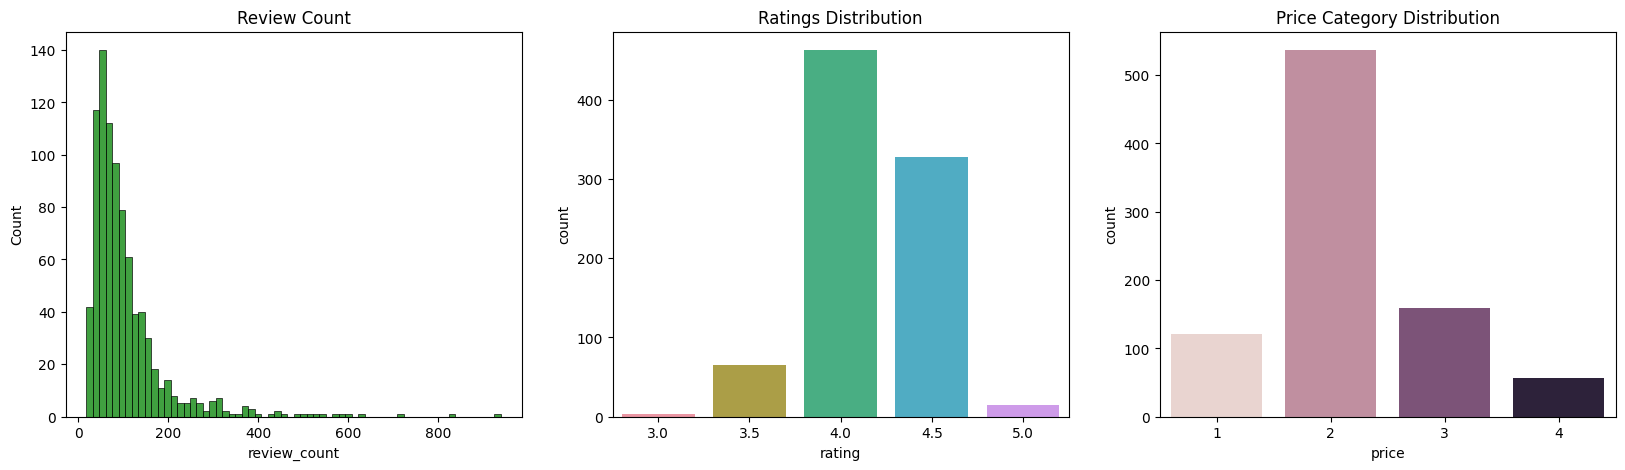

In [10]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sb.set_palette(sb.cubehelix_palette(4))
sb.histplot(clean_df['review_count'], color='g', ax=axes[0]).set_title('Review Count')
sb.countplot(x=clean_df['rating'], ax=axes[1]).set_title('Ratings Distribution')
sb.countplot(x=clean_df['price'], ax=axes[2]).set_title('Price Category Distribution')
plt.show()

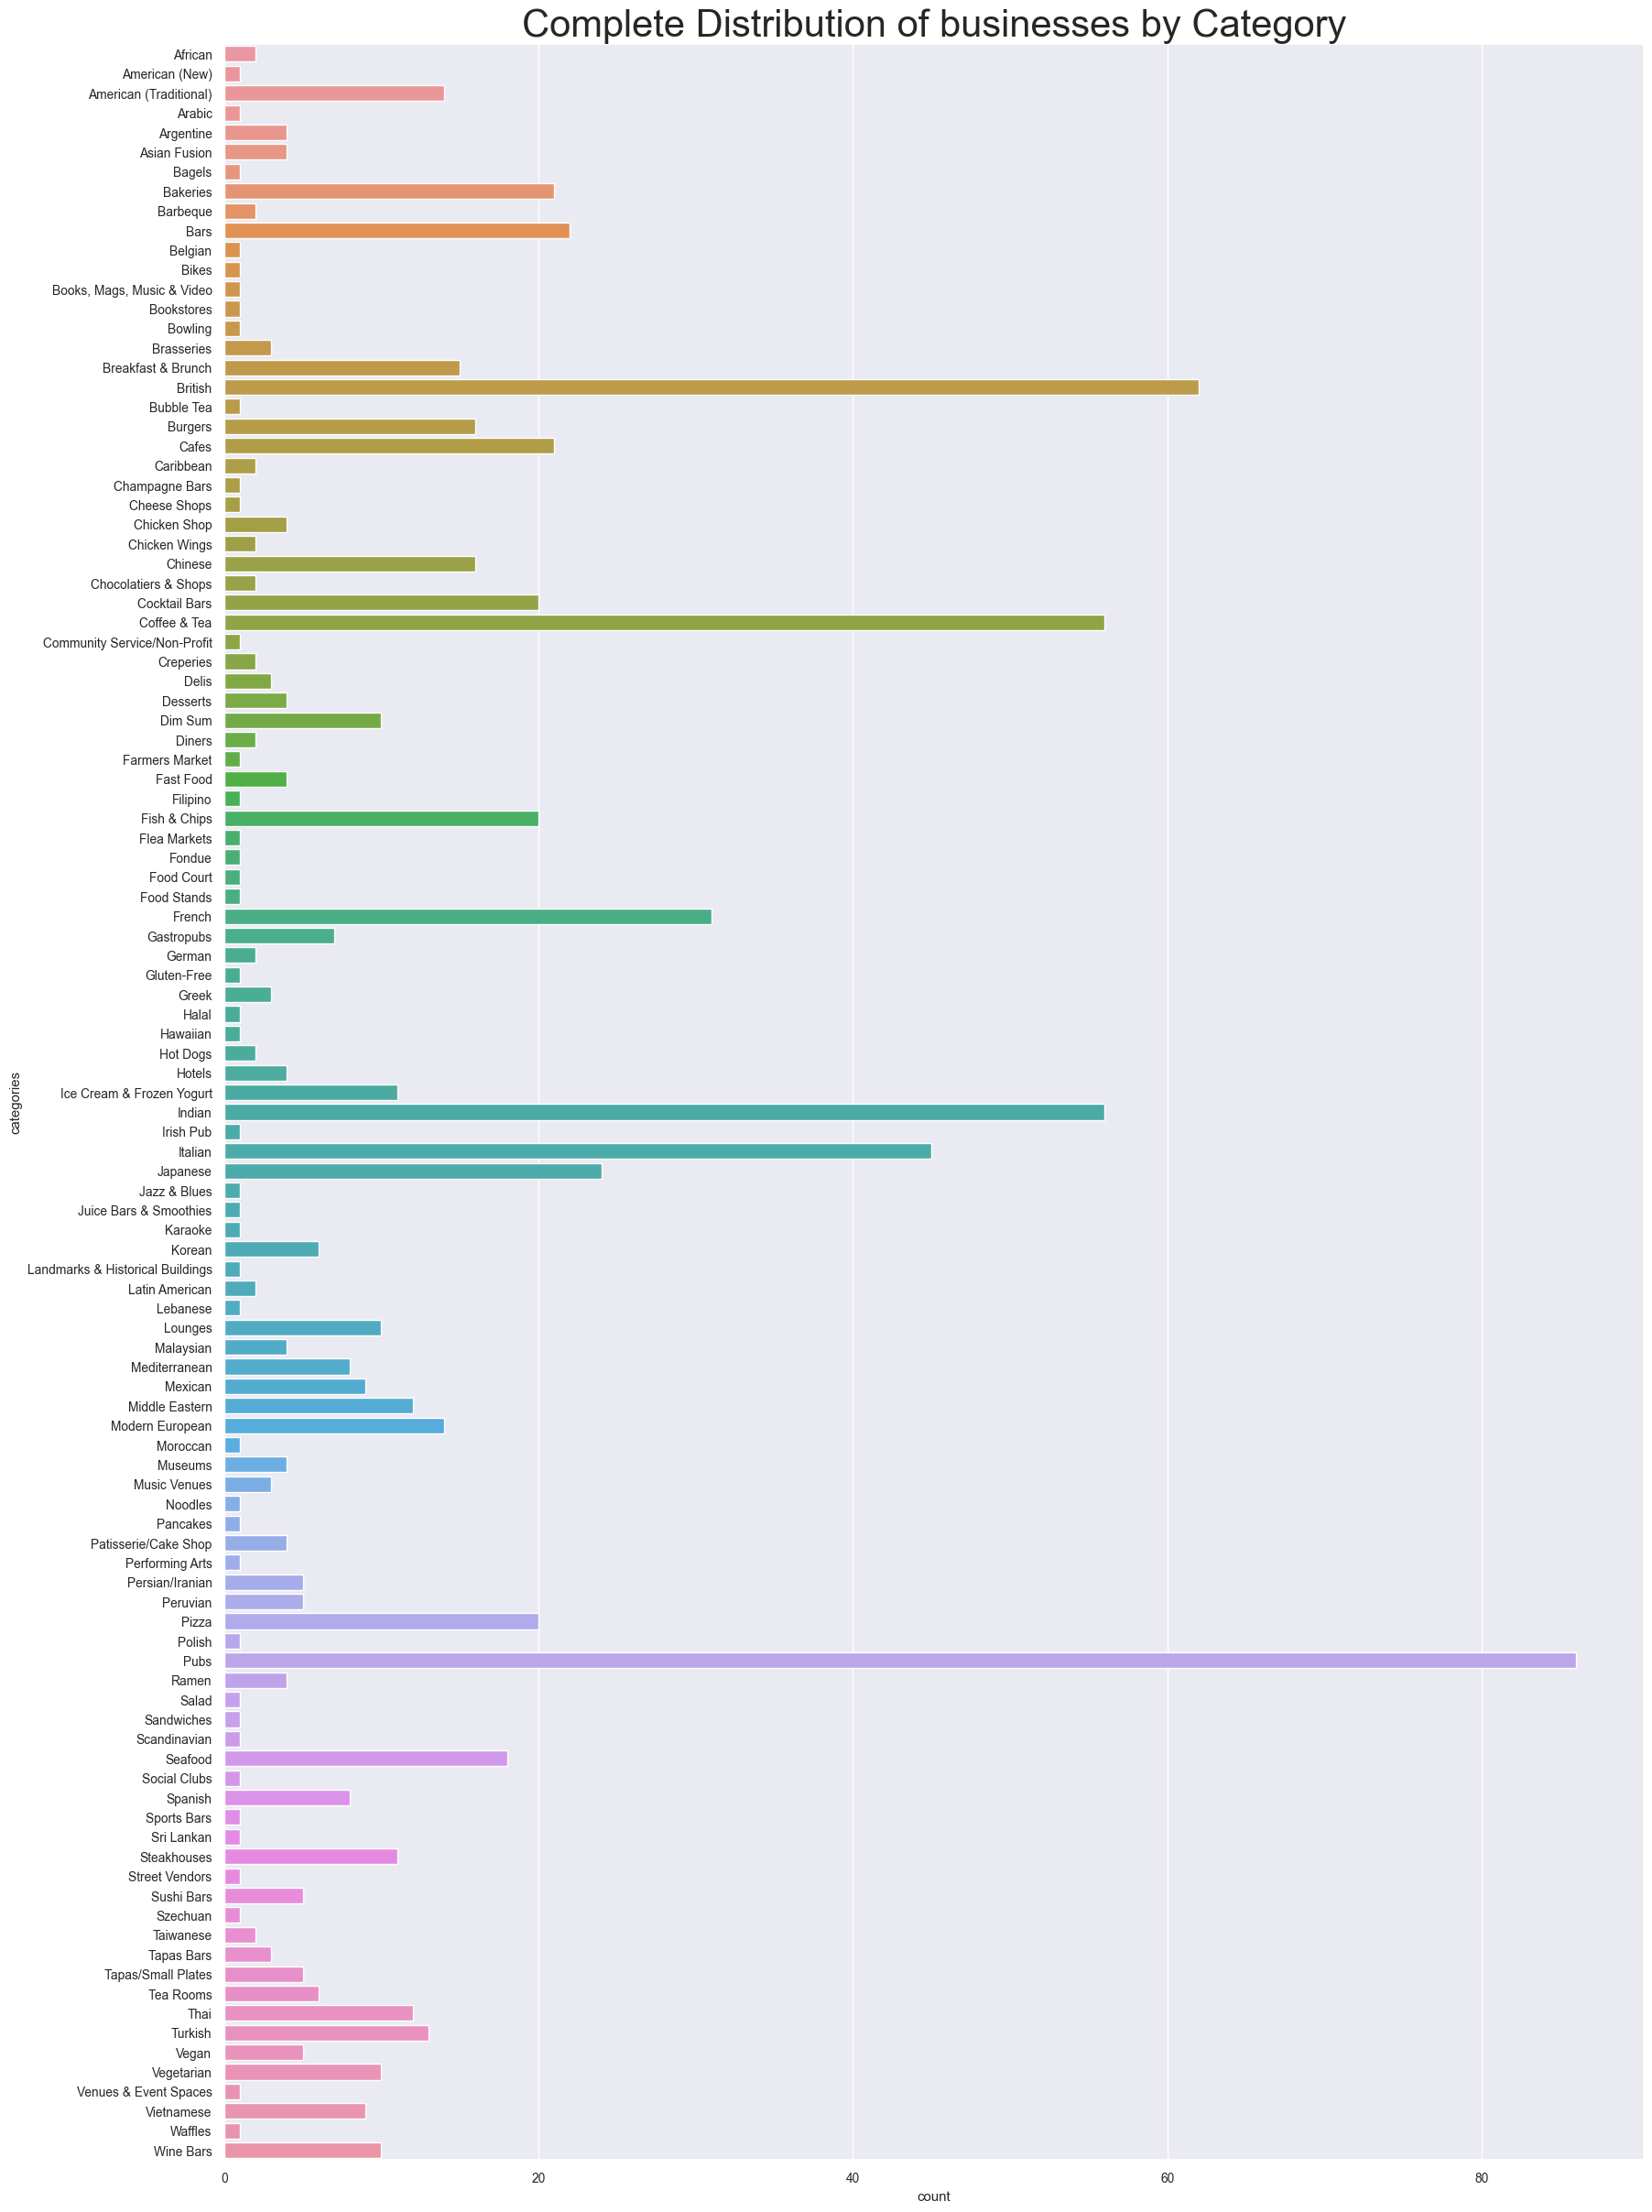

In [79]:
fig = plt.subplots(figsize = (20,30))
sb.set(font_scale=1)
sb.set_palette(sb.cubehelix_palette(1))
sb.countplot(y=clean_df['categories'].sort_values(ascending = True))
plt.title('Complete Distribution of businesses by Category',fontdict={'fontsize': 30})
plt.show()

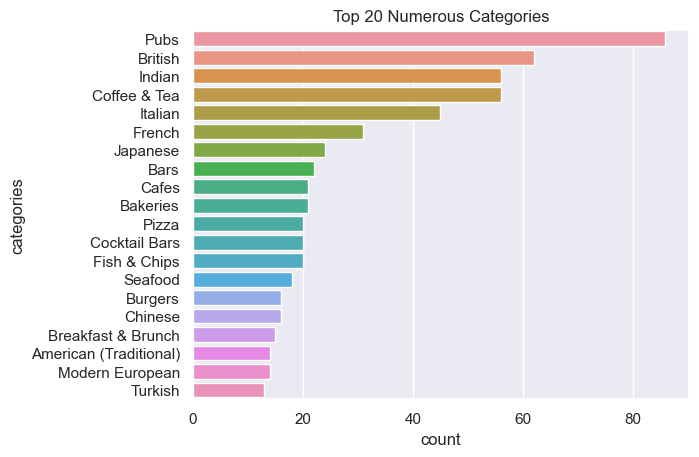

In [129]:
num = 20
fig = plt.subplots()
sb.set_palette(sb.cubehelix_palette(1))
top_ten =clean_df['categories'].value_counts()[0:num].index.tolist()
values = clean_df[clean_df['categories'].isin(top_ten)]['categories']
sb.countplot(y=values, order=clean_df['categories'].value_counts()[0:num].index)
plt.title(f'Top {num} Numerous Categories')
plt.show()

In [19]:
list_coor = clean_df[['name','latitude','longitude']].values.tolist()

map_new = folium.Map()
for coor in list_coor:
    map_new.add_child(folium.Marker(location=[coor[1],coor[2]],popup=coor[0],icon=folium.Icon(color='green')))

map_new.save('yelp_location_london.html')